In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_test)

10000

In [8]:
# Create directories for train and test datasets
train_dir = 'mnist/train'
test_dir = 'mnist/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [9]:
# Create directories for each class
for i in range(10):
  os.makedirs(f'{train_dir}/{i}', exist_ok=True)
  os.makedirs(f'{test_dir}/{i}', exist_ok=True)

In [10]:
from keras.preprocessing.image import save_img

# Save train images
for idx, (image, label) in enumerate(zip(X_train, Y_train)):
    save_path = f'{train_dir}/{label}/{idx}.png'
    save_img(save_path, np.expand_dims(image, axis=-1))

# Save test images
for idx, (image, label) in enumerate(zip(X_test, Y_test)):
    save_path = f'{test_dir}/{label}/{idx}.png'
    save_img(save_path, np.expand_dims(image, axis=-1))


In [41]:

# Load the training data
train_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32
)

# Load the test data
test_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32
)


Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [42]:
class_names = train_dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [43]:
len(class_names)

10

**visualize the data**

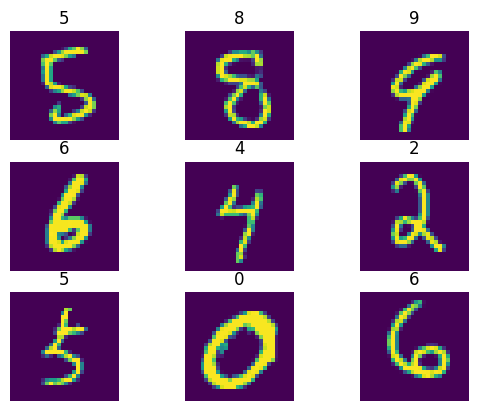

In [44]:
for image_batch, label_batch in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

plt.show()

** configure dataset**

In [45]:
train_size = int(len(train_dataset) *0.7)
test_size = int(len(train_dataset) *0.1)
val_size = int(len(train_dataset) *0.2)

In [16]:
print(train_size, test_size, val_size)

1312 187 375


In [46]:
train_ds = train_dataset.take(train_size)
val_ds = train_dataset.skip(train_size).take(val_size)
test_ds = train_dataset.skip(train_size+val_size).take(test_size)


In [59]:
print(train_ds)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

standardize data

In [36]:
# resize_and_rescale= Sequential([
#     layers.Resizing(28, 28),
#     layers.Rescaling(1./255)
# ])

**model**

In [62]:

model = Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [61]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_75 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_77 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=10
)

Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 58s 43ms/step - accuracy: 0.8198 - loss: 0.5560 - val_accuracy: 0.9683 - val_loss: 0.1026
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 53s 40ms/step - accuracy: 0.9709 - loss: 0.0981 - val_accuracy: 0.9799 - val_loss: 0.0700
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - accuracy: 0.9785 - loss: 0.0689 - val_accuracy: 0.9782 - val_loss: 0.0680
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - accuracy: 0.9837 - loss: 0.0529 - val_accuracy: 0.9805 - val_loss: 0.0670
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - accuracy: 0.9872 - loss: 0.0420 - val_accuracy: 0.9840 - val_loss: 0.0555
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - accuracy: 0.9907 - loss: 0.0331 - val_accuracy: 0.9844 - val_loss: 0.0543
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.9907 - loss: 0.0278 - val_accuracy: 0.9820 - val_loss: 0.0644
Epoch 8/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - accuracy: 0.9923 -

plot results

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

[]

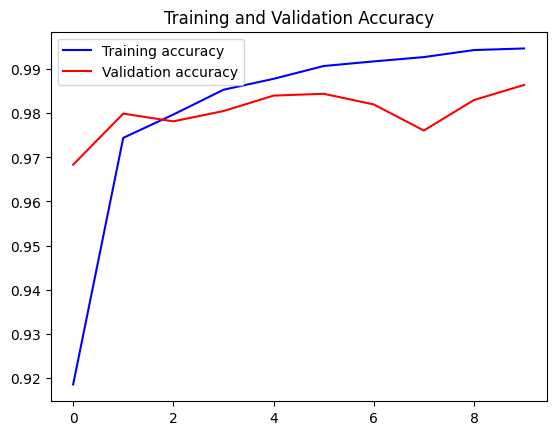

In [54]:
plt.plot( acc, 'b', label='Training accuracy')
plt.plot( val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.plot()

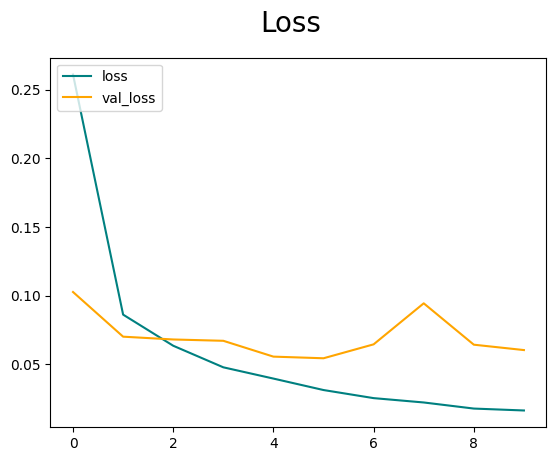

In [63]:
fig = plt.figure()
plt.plot(loss, color='teal', label='loss')
plt.plot(val_loss, color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [55]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 5s - 16ms/step - accuracy: 0.9859 - loss: 0.0599
Test accuracy: 0.9858999848365784
